In [45]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
import seaborn as sns


In [73]:
df=pd.read_excel('WA_Fn-UseC_-Telco-Customer-Churn.xlsx',sheetname=0)

In [74]:
#print multiple lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.as_node_interactivity = "all"

In [75]:
#Explore Data
df.shape
type(df)
df.size
df.head()
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [76]:
# check missing values
pd.isnull(df).any()


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [71]:
df['TotalCharges']=df.TotalCharges.fillna(df['TotalCharges'].mode())

C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\algorithms.py:531: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  warn("Unable to sort modes: %s" % e)


In [77]:
pd.isnull(df).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [79]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300440
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [81]:
# group by leavening customers or not
df.groupby(['Churn']).size()

Churn
No     5174
Yes    1869
dtype: int64

In [82]:
#Convert into Chun Yes or No to 0 or 1
le=preprocessing.LabelEncoder()
le.fit(df['Churn'])

LabelEncoder()

In [83]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [84]:
dfn=le.transform(df['Churn'])

In [85]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [87]:
df['Churn_Y']=dfn

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
Churn_Y             7043 non-nul

In [89]:
#separate categorical variables for converstion into numerical
x_cat=df.loc[:,('gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod')]
x_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [92]:
x_num=df.loc[:,('SeniorCitizen','tenure','MonthlyCharges','TotalCharges')]

In [94]:
#Conversion Categorical into dummy
x_num1=pd.get_dummies(x_cat)
x_num1.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [98]:
x=pd.concat([x_num1,x_num],axis=1)
x.head(2)

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,29.85,29.85
1,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,34,56.95,1889.50


In [95]:
#Categorical dependent variable Churn_Y
y=df['Churn_Y']
y.head(2)

0    0
1    0
Name: Churn_Y, dtype: int64

In [96]:
#everthing is ready bulding model

In [99]:
#Split the data for trainig and testing 
train_x,text_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)

In [100]:
train_x.shape

(5282, 45)

In [102]:
train_y.shape

(5282,)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
logi=LogisticRegression()

In [105]:
logi.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
coeff= pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(logi.coef_))],axis=1)

In [116]:
coeff.columns=("Variables","Coeffs")
coeff.sort_values('Variables',ascending=True)

,Variables,Coeffs
32,Contract_Month-to-month,0.491889
33,Contract_One year,-0.140402
34,Contract_Two year,-0.485444
4,Dependents_No,-0.042698
5,Dependents_Yes,-0.091259
20,DeviceProtection_No,0.046102
21,DeviceProtection_No internet service,-0.103436
22,DeviceProtection_Yes,-0.076622
11,InternetService_DSL,-0.344820
12,InternetService_Fiber optic,0.314300


In [121]:
#Predections
p=logi.predict(text_x)

In [123]:
p.size

1761

In [126]:
print("Yes",test_y[y==1].shape[0])
print("No",test_y[y==0].shape[0])

Yes 434
No 1327


In [127]:
#precesion and recall
print("Accuracy:",metrics.accuracy_score(test_y,p))

Accuracy: 0.810335036911


In [129]:
#Precesion / Recall
print(metrics.classification_report(test_y,p))

             precision    recall  f1-score   support

          0       0.86      0.89      0.88      1327
          1       0.63      0.57      0.60       434

avg / total       0.80      0.81      0.81      1761



In [136]:
metrics.roc_auc_score(test_y,p)

0.72839883455630827

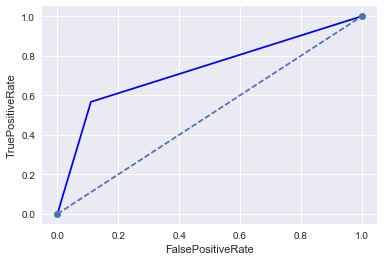

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
fpr,tpr,th=metrics.roc_curve(test_y,p)
roc_auc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'o--')
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.show()

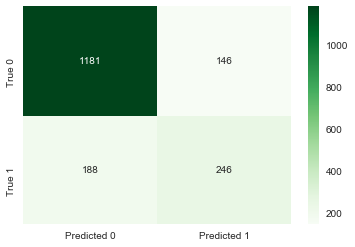

In [161]:
#Confusion Matrix
cFM= metrics.confusion_matrix(test_y,p)
lb1=['Predicted 0','Predicted 1']
lb2=['True 0','True 1']
sns.heatmap(cFM,xticklabels=lb1,yticklabels=lb2,annot=True,fmt='d',cmap='Greens')